# **MÓDULO 14 - Exercício**
# Pré Processamento dos Dados - A primeira etapa Pré Modelagem

Para nossa atividade usaremos uma base de churn também, porém essa base não diz respeito a serviços bancários e sim serviços de internet, telefone e tv - Telecomunicação.

Vamos realizar aqui as etapas de limpeza e tratamento de dados vistos durante a aula, porém aplicados a essa base nova.

In [209]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


In [210]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("CHURN_TELECON_MOD08_TAREFA.csv", delimiter=';')

df.head(10)

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),NaN,1840.75,No
4,9237-HQITU,NaN,0,No,No,2,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,NaN,151.65,Yes
5,9305-CDSKC,NaN,0,No,No,8,Yes,Fiber optic,No,No,Yes,Month-to-month,Electronic check,NaN,820.50,NaN
6,1452-KIOVK,NaN,0,No,Yes,22,Yes,Fiber optic,No,No,Yes,Month-to-month,Credit card (automatic),NaN,1949.40,NaN
7,6713-OKOMC,NaN,0,No,No,10,No,DSL,Yes,No,No,Month-to-month,Mailed check,NaN,301.90,NaN
8,7892-POOKP,NaN,0,Yes,No,28,Yes,Fiber optic,No,Yes,Yes,Month-to-month,Electronic check,NaN,3046.05,NaN
9,6388-TABGU,NaN,0,No,Yes,62,Yes,dsl,Yes,No,No,One year,Bank transfer (automatic),NaN,3487.95,NaN


In [211]:
df

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),NaN,1840.75,No
4,9237-HQITU,NaN,0,No,No,2,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,NaN,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,6188-UXBBR,Female,0,Yes,No,38,Yes,No,No internet service,No internet service,No internet service,One year,Credit card (automatic),20.25,814.75,No
2496,2333-KWEWW,Male,0,No,No,18,Yes,No,No internet service,No internet service,No internet service,Two year,Credit card (automatic),20.05,388.60,No
2497,5702-SKUOB,Female,0,Yes,No,4,Yes,No,No internet service,No internet service,No internet service,Month-to-month,Mailed check,19.60,93.45,No
2498,1134-YWTYF,Male,0,Yes,No,27,Yes,DSL,No,Yes,No,Month-to-month,Electronic check,53.80,1389.85,No


Legenda dos dados:

*   **CustomerID** : Esse é o ID único de cada cliente nosso da rede de produtos de telecomunicação.

*   **Genero** : O genero dos nossos clientes.

*   **Idoso** : Se nosso cliente tem acima de 60 anos ou não. (Sim = 1 | Não = 0)

*   **Casado** : Se nosso cliente é casado ou não.

*   **Dependents** : Se cliente tem dependentes.

*   **Tempo_como_Cliente** : Tempo em meses que nosso cliente está com a nossa empresa.

*   **PhoneService** : Se ele contratou serviço telefônico com a nossa empresa.

*   **Servico_Internet** : Qual o tipo de serviço de internet contratado.

*   **Servico_Seguranca** : Se ele contratou serviço de segurança com a nossa empresa.

*   **Suporte_Tecnico** : Se já acionou o suporte técnico.

*   **StreamingTV** : Se ele contratou serviço de streaming para TV.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **PaymentMethod** : Forma de Pagamento.

*   **Pagamento_Mensal** : Quanto o cliente pagava mensalmente.

*   **Total_Pago** : Total já pago pelo cliente para nossa companhia.

*   **Churn** : Nossa coluna mais importante, se nosso cliente nos abandonou ou não.




## 1 - Carregue a base, verifique se os tipos de dados estão de acordo com cada coluna e caso não estejam realize a transformação dos tipos de dados.

In [212]:
#seu código aqui
df.dtypes

customerID             object
Genero                 object
Idoso                   int64
Casado                 object
Dependents             object
Tempo_como_Cliente      int64
PhoneService           object
Servico_Internet       object
Servico_Seguranca      object
Suporte_Tecnico        object
StreamingTV            object
Tipo_Contrato          object
PaymentMethod          object
Pagamento_Mensal      float64
Total_Pago            float64
Churn                  object
dtype: object

Não creio que nenhuma alteração deva ser feito ainda pois nenhuma coluna numerica está como string e ainda não foi verificado se existem valores nulos.

## 2 - Esse exercício faremos por etapas:
### A) Verifique se temos colunas com dados faltantes e traga a % dos dados faltantes por coluna.

In [213]:
# Porcentagem de valores nulos em cada coluna
(df.isnull().sum() / len(df)) * 100

customerID             0.00
Genero                 0.48
Idoso                  0.00
Casado                 0.00
Dependents             0.00
Tempo_como_Cliente     0.00
PhoneService          59.28
Servico_Internet       0.00
Servico_Seguranca      0.00
Suporte_Tecnico        0.00
StreamingTV            0.00
Tipo_Contrato          0.00
PaymentMethod          0.00
Pagamento_Mensal      13.00
Total_Pago             0.00
Churn                  0.20
dtype: float64

### B) Exclua nessa etapa as linhas das colunas com dados faltantes que você analisar que esse método é o ideal. Justifique o motivo de estar excluindo essas linhas.

In [214]:
# Para termos certeza teremos que analisar mais a fundo a distribuição dos dados.
df.drop(['customerID'], inplace=True, axis=1)

Pelo ID ser um número somente para identificar um cliente em um banco de dados ele não ajudará em qualquer modelo de machine lerning ou análise que será feito

### C) Nessa etapa substitua pela média, mediana ou moda as linhas das colunas com valores faltantes que você analisou e entendeu que esse era o melhor método. Não se esqueça de justificar sua escolha.

A coluna 'Genero' e 'Churn' tem um valor baixo de quantidade de valores nulos, podemos excluir esses valores pois nao alteraram tanto a analise que será realizada

In [215]:
df.dropna(subset=['Genero'], inplace=True)
df.dropna(subset=['Churn'], inplace=True)

# Verificando se ainda existem valores nulos
df.isnull().sum()

Genero                   0
Idoso                    0
Casado                   0
Dependents               0
Tempo_como_Cliente       0
PhoneService          1482
Servico_Internet         0
Servico_Seguranca        0
Suporte_Tecnico          0
StreamingTV              0
Tipo_Contrato            0
PaymentMethod            0
Pagamento_Mensal       313
Total_Pago               0
Churn                    0
dtype: int64

Agora para a coluna 'Pagamento_Mensal'

In [216]:
# Para termos certeza teremos que analisar mais a fundo a distribuição dos dados.
df['Pagamento_Mensal'].mean()

65.60756321839081

In [217]:
#Para termos certeza teremos que analisar mais a fundo a distribuição dos dados.
df['Pagamento_Mensal'].median()

71.45

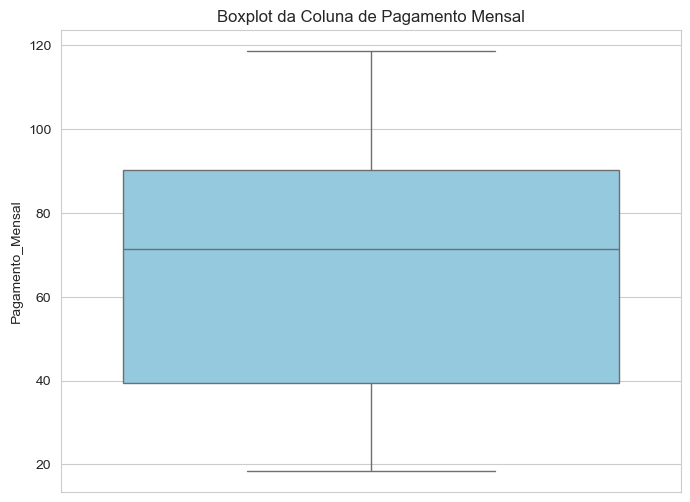

In [218]:
# é uma função da biblioteca Seaborn que define o estilo estético dos gráficos produzidos por Seaborn. Neste caso, 'whitegrid' é um dos estilos disponíveis em Seaborn
sns.set_style('whitegrid')

# Plota o boxplot da coluna de salário
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Pagamento_Mensal', color='skyblue')
plt.title('Boxplot da Coluna de Pagamento Mensal')
plt.ylabel('Pagamento_Mensal')
plt.show()

Como a média e a mediana estão próximas e não existem outliers, podemos trocar os valores nulos pela média do Pagamento Mensal.

In [219]:
mediana = df['Pagamento_Mensal'].median()
df['Pagamento_Mensal'].fillna(mediana, inplace=True)

# Verificando se ainda existem valores nulos
df.isnull().sum()

C:\Users\ramon\AppData\Local\Temp\ipykernel_11916\1624359551.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Pagamento_Mensal'].fillna(mediana, inplace=True)


Genero                   0
Idoso                    0
Casado                   0
Dependents               0
Tempo_como_Cliente       0
PhoneService          1482
Servico_Internet         0
Servico_Seguranca        0
Suporte_Tecnico          0
StreamingTV              0
Tipo_Contrato            0
PaymentMethod            0
Pagamento_Mensal         0
Total_Pago               0
Churn                    0
dtype: int64

Agora a última coluna com valores nulos, 'PhoneService'

In [220]:
# Verificar a distribuição dos valores na coluna PhoneService
df['PhoneService'].value_counts(dropna=False)


PhoneService
NaN    1482
Yes     920
No       86
Name: count, dtype: int64

In [221]:
# Calcular a moda da coluna PhoneService
moda_phone_service = df['PhoneService'].mode()[0]

# Substituir os valores nulos pela moda
df['PhoneService'].fillna(moda_phone_service, inplace=True)

# Verificar se ainda existem valores nulos
df['PhoneService'].isnull().sum()

C:\Users\ramon\AppData\Local\Temp\ipykernel_11916\1895163246.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PhoneService'].fillna(moda_phone_service, inplace=True)


0

In [222]:
df.isnull().sum()

Genero                0
Idoso                 0
Casado                0
Dependents            0
Tempo_como_Cliente    0
PhoneService          0
Servico_Internet      0
Servico_Seguranca     0
Suporte_Tecnico       0
StreamingTV           0
Tipo_Contrato         0
PaymentMethod         0
Pagamento_Mensal      0
Total_Pago            0
Churn                 0
dtype: int64

Como PhoneService é uma coluna categórica, a moda é o método mais apropriado para substituir os valores nulos, isso garante que os valores faltantes sejam substituídos pelo valor mais comum na coluna

## 3 - Verifique se encontramos valores digitados incorretamente, ou com letras maiusculas ou minusculas, ou até mesmo mesmos valores porém escritos de forma dirente e corrija.

In [223]:
# Vendo se existem valores digitados errados ou de formas diferentes
df['Genero'].unique()

array(['Female', 'Male', 'F', 'M', 'f'], dtype=object)

In [224]:
df['Genero'] = df['Genero'].replace('F', 'Female')
df['Genero'] = df['Genero'].replace('f', 'Female')
df['Genero'] = df['Genero'].replace('M', 'Male')
df = df.drop(df[df['Genero'] == 'nan'].index)
df['Genero'].unique()

array(['Female', 'Male'], dtype=object)

In [225]:
df['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [226]:
df = df.drop(df[df['PhoneService'] == 'nan'].index)
df['PhoneService'].unique()

array(['No', 'Yes'], dtype=object)

In [227]:
df['Servico_Internet'].unique()

array(['DSL', 'No', 'Fiber optic', 'dsl'], dtype=object)

In [228]:
df['Servico_Internet'] = df['Servico_Internet'].replace('dsl', 'DSL')
df['Servico_Internet'].unique()

array(['DSL', 'No', 'Fiber optic'], dtype=object)

### [EXTRA] 4 - Caso deseje, para manter um padrão na sua base, renomeie as colunas ou deixando todas em caixa baixa ou caixa alta. 

Traduzindo para português as colunas Dependents, PhoneService e PaymentMethod    

In [229]:
df.rename(columns={'Dependents': 'Dependentes'}, inplace=True)
df.rename(columns={'PhoneService': 'ServicoTelefone'}, inplace=True)
df.rename(columns={'PaymentMethod': 'MetodoPagamento'}, inplace=True)

Colocando todos os nomes em caixa alta

In [232]:
# Colocando todos os valores em maiúsculo
df['Genero'] = df['Genero'].str.upper()
df['Dependentes'] = df['Dependentes'].str.upper()
df['ServicoTelefone'] = df['ServicoTelefone'].str.upper()
df['Servico_Internet'] = df['Servico_Internet'].str.upper()
df['MetodoPagamento'] = df['MetodoPagamento'].str.upper()
df['Churn'] = df['Churn'].str.upper()
df['Tipo_Contrato'] = df['Tipo_Contrato'].str.upper()
df['StreamingTV'] = df['StreamingTV'].str.upper()
df['Suporte_Tecnico'] = df['Suporte_Tecnico'].str.upper()
df['Casado'] = df['Casado'].str.upper()
df['Servico_Seguranca'] = df['Servico_Seguranca'].str.upper()

In [233]:
df.head()

,Genero,Idoso,Casado,Dependentes,Tempo_como_Cliente,ServicoTelefone,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,MetodoPagamento,Pagamento_Mensal,Total_Pago,Churn
0,FEMALE,0,YES,NO,1,NO,DSL,NO,NO,NO,MONTH-TO-MONTH,ELECTRONIC CHECK,29.85,29.85,NO
1,MALE,0,NO,NO,34,YES,DSL,YES,NO,NO,ONE YEAR,MAILED CHECK,56.95,1889.50,NO
2,MALE,0,NO,NO,2,YES,DSL,YES,NO,NO,MONTH-TO-MONTH,MAILED CHECK,53.85,108.15,YES
3,MALE,0,NO,NO,45,NO,DSL,YES,YES,NO,ONE YEAR,BANK TRANSFER (AUTOMATIC),71.45,1840.75,NO
16,FEMALE,0,NO,NO,52,YES,NO,NO INTERNET SERVICE,NO INTERNET SERVICE,NO INTERNET SERVICE,ONE YEAR,MAILED CHECK,71.45,1022.95,NO
